<a href="https://colab.research.google.com/github/shoreey/Heart-Disease-Analysis-and-Prediction/blob/main/Heart_Disease_Analysis_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


# Loading the Dataset

In [ ]:
file_path = "C:\Heart Disease.xlsx"
df = pd.read_excel(file_path)


# Exploratory Data Analysis

# Overview of the data

In [ ]:
print(df.head())
print(df.info())


   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2 

# Summary Stats

In [ ]:
print(df.describe())


              male          age    education  currentSmoker   cigsPerDay  \
count  4238.000000  4238.000000  4133.000000    4238.000000  4209.000000   
mean      0.429212    49.584946     1.978950       0.494101     9.003089   
std       0.495022     8.572160     1.019791       0.500024    11.920094   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4185.000000      4238.000000   4238.000000  4238.000000  4188.000000   
mean      0.029630         0.005899      0.310524     0.025720   236.721585   
std       0.169584         0.076587      0.462763     0.158316    44.590334   

# Missing  Values

In [ ]:
print(df.isnull().sum())


male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


# Data Visualization

Count of Heart Disease Cases:
TenYearCHD
0    3594
1     644
Name: count, dtype: int64


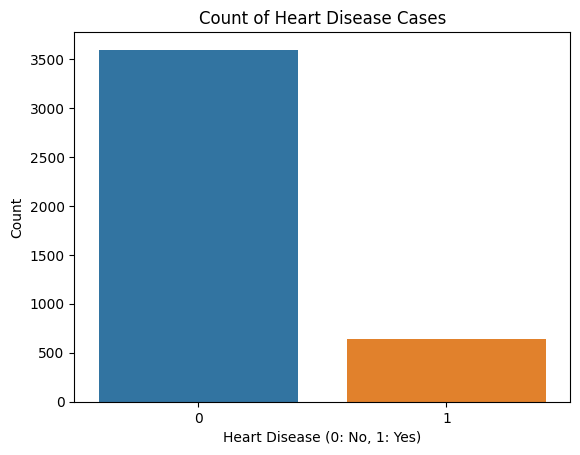

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for Heart Disease Cases
sns.countplot(x='TenYearCHD', data=df)
plt.title('Count of Heart Disease Cases')
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Count')

# Display the count
heart_disease_count = df['TenYearCHD'].value_counts()
print("Count of Heart Disease Cases:")
print(heart_disease_count)

# Show the plot
plt.show()


Count of Heart Disease Cases by Age:
age         (31.962, 33.9]  (33.9, 35.8]  (35.8, 37.7]  (37.7, 39.6]  \
TenYearCHD                                                             
0                        6            58           169           299   
1                        0             2             7            14   

age         (39.6, 41.5]  (41.5, 43.4]  (43.4, 45.3]  (45.3, 47.2]  \
TenYearCHD                                                           
0                    339           312           298           284   
1                     26            27            30            39   

age         (47.2, 49.1]  (49.1, 51.0]  (51.0, 52.9]  (52.9, 54.8]  \
TenYearCHD                                                           
0                    260           234           117           230   
1                     45            52            32            41   

age         (54.8, 56.7]  (56.7, 58.6]  (58.6, 60.5]  (60.5, 62.4]  \
TenYearCHD                                

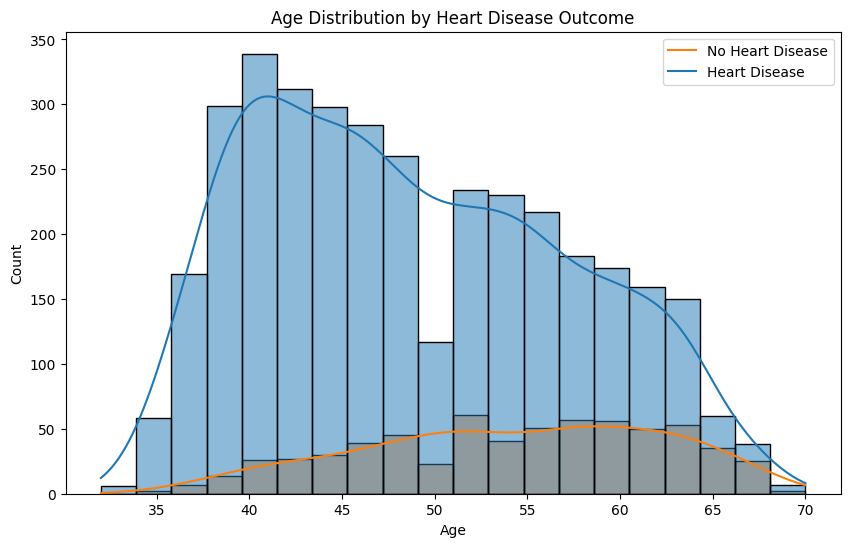

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a histogram
sns.histplot(data=df, x='age', hue='TenYearCHD', bins=20, kde=True)

# Set plot details
plt.title('Age Distribution by Heart Disease Outcome')
plt.xlabel('Age')
plt.ylabel('Count')

# Add legend
plt.legend(labels=['No Heart Disease', 'Heart Disease'])

# Display the count
heart_disease_count_by_age = df.groupby(['TenYearCHD', pd.cut(df['age'], bins=20)]).size().unstack(fill_value=0)
print("Count of Heart Disease Cases by Age:")
print(heart_disease_count_by_age)

# Show the plot
plt.show()


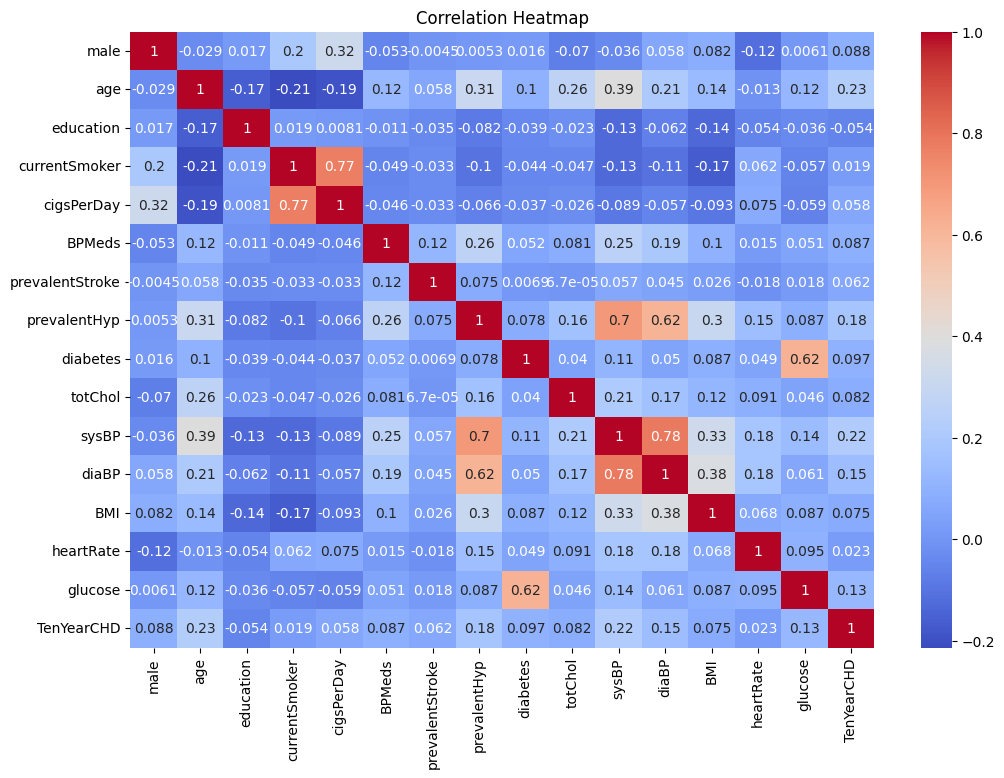

Correlation Matrix:
                     male       age  education  currentSmoker  cigsPerDay  \
male             1.000000 -0.028979   0.017352       0.197596    0.317930   
age             -0.028979  1.000000  -0.165883      -0.213748   -0.192791   
education        0.017352 -0.165883   1.000000       0.018532    0.008085   
currentSmoker    0.197596 -0.213748   0.018532       1.000000    0.769690   
cigsPerDay       0.317930 -0.192791   0.008085       0.769690    1.000000   
BPMeds          -0.052506  0.122995  -0.010815      -0.048938   -0.046134   
prevalentStroke -0.004546  0.057655  -0.035112      -0.032988   -0.032707   
prevalentHyp     0.005313  0.307194  -0.081970      -0.103260   -0.066146   
diabetes         0.015708  0.101258  -0.038680      -0.044295   -0.037067   
totChol         -0.070322  0.262131  -0.023115      -0.046562   -0.026320   
sysBP           -0.035989  0.394302  -0.129631      -0.130230   -0.088780   
diaBP            0.057933  0.206104  -0.062316      -0.1

In [ ]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
correlation_matrix = df.corr()
print("Correlation Matrix:")
print(correlation_matrix)



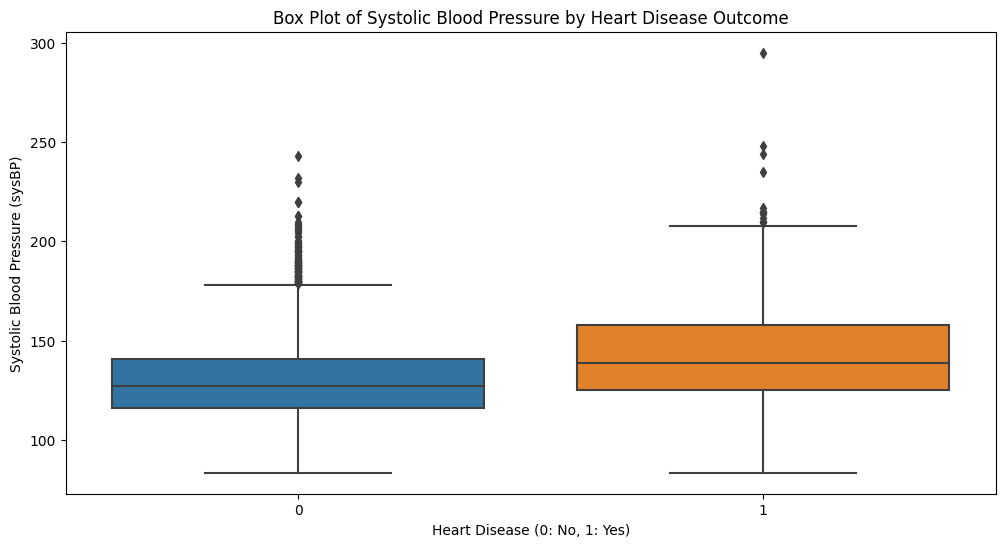

Summary Statistics of Systolic Blood Pressure by Heart Disease Outcome:
             count        mean        std   min    25%    50%    75%    max
TenYearCHD                                                                 
0           3594.0  130.333612  20.455232  83.5  116.0  127.0  141.0  243.0
1            644.0  143.618789  26.690282  83.5  125.0  139.0  158.0  295.0


In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='TenYearCHD', y='sysBP')
plt.title('Box Plot of Systolic Blood Pressure by Heart Disease Outcome')
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Systolic Blood Pressure (sysBP)')
plt.show()


C:\Users\shaur\anaconda3\envs\yolov8\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


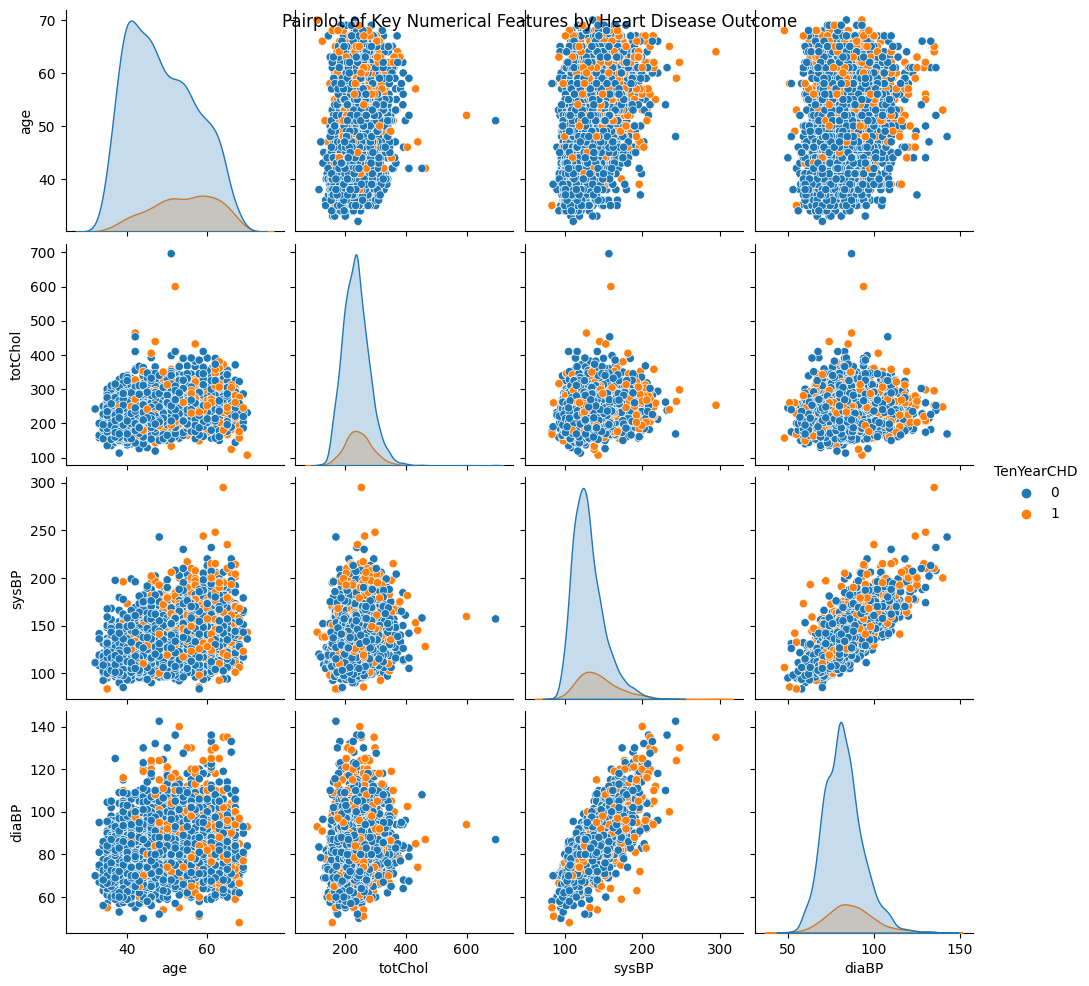

Pair Plot Statistics of Key Numerical Features by Heart Disease Outcome:
               age                                                    totChol  \
             count       mean       std   min   25%   50%   75%   max   count   
TenYearCHD                                                                      
0           3594.0  48.767668  8.413457  32.0  42.0  48.0  55.0  70.0  3594.0   
1            644.0  54.145963  8.005663  35.0  48.0  55.0  61.0  70.0   644.0   

                        ...  sysBP          diaBP                              \
                  mean  ...    75%    max   count       mean        std   min   
TenYearCHD              ...                                                     
0           235.190202  ...  141.0  243.0  3594.0  82.160963  11.338149  50.0   
1           245.267848  ...  158.0  295.0   644.0  86.981366  14.026900  48.0   

                                     
             25%   50%   75%    max  
TenYearCHD                           
0

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pair plot
sns.pairplot(df, vars=['age', 'totChol', 'sysBP', 'diaBP'], hue='TenYearCHD')

# Set plot details
plt.suptitle('Pairplot of Key Numerical Features by Heart Disease Outcome')

# Display the plot
plt.show()

# Print the pair plot statistics
print("Pair Plot Statistics of Key Numerical Features by Heart Disease Outcome:")
pairplot_statistics = df.groupby('TenYearCHD')[['age', 'totChol', 'sysBP', 'diaBP']].describe()
print(pairplot_statistics)


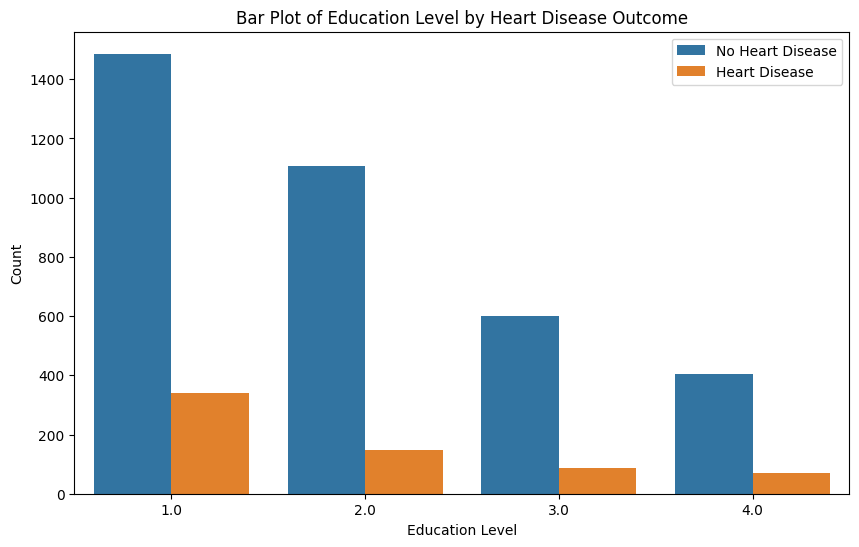

Count of Heart Disease Cases by Education Level:
education    1.0   2.0  3.0  4.0
TenYearCHD                      
0           1486  1106  599  403
1            339   147   88   70


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot
sns.countplot(data=df, x='education', hue='TenYearCHD')

# Set plot details
plt.title('Bar Plot of Education Level by Heart Disease Outcome')
plt.xlabel('Education Level')
plt.ylabel('Count')

# Add legend
plt.legend(labels=['No Heart Disease', 'Heart Disease'])

# Display the plot
plt.show()

# Print the count of heart disease cases by education level
print("Count of Heart Disease Cases by Education Level:")
heart_disease_count_by_education = df.groupby(['TenYearCHD', 'education']).size().unstack(fill_value=0)
print(heart_disease_count_by_education)


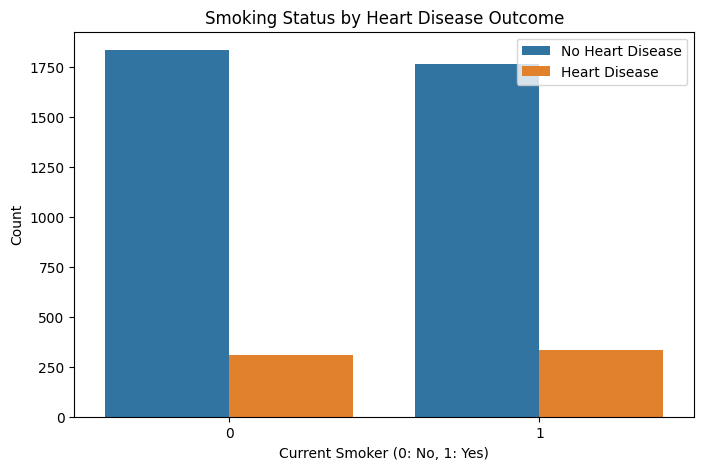

Count of Heart Disease Cases by Smoking Status:
currentSmoker     0     1
TenYearCHD               
0              1833  1761
1               311   333


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(8, 5))

# Create a count plot
sns.countplot(data=df, x='currentSmoker', hue='TenYearCHD')

# Set plot details
plt.title('Smoking Status by Heart Disease Outcome')
plt.xlabel('Current Smoker (0: No, 1: Yes)')
plt.ylabel('Count')

# Add legend
plt.legend(labels=['No Heart Disease', 'Heart Disease'])

# Display the plot
plt.show()

# Print the count of heart disease cases by smoking status
print("Count of Heart Disease Cases by Smoking Status:")
heart_disease_count_by_smoking = df.groupby(['TenYearCHD', 'currentSmoker']).size().unstack(fill_value=0)
print(heart_disease_count_by_smoking)


C:\Users\shaur\anaconda3\envs\yolov8\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


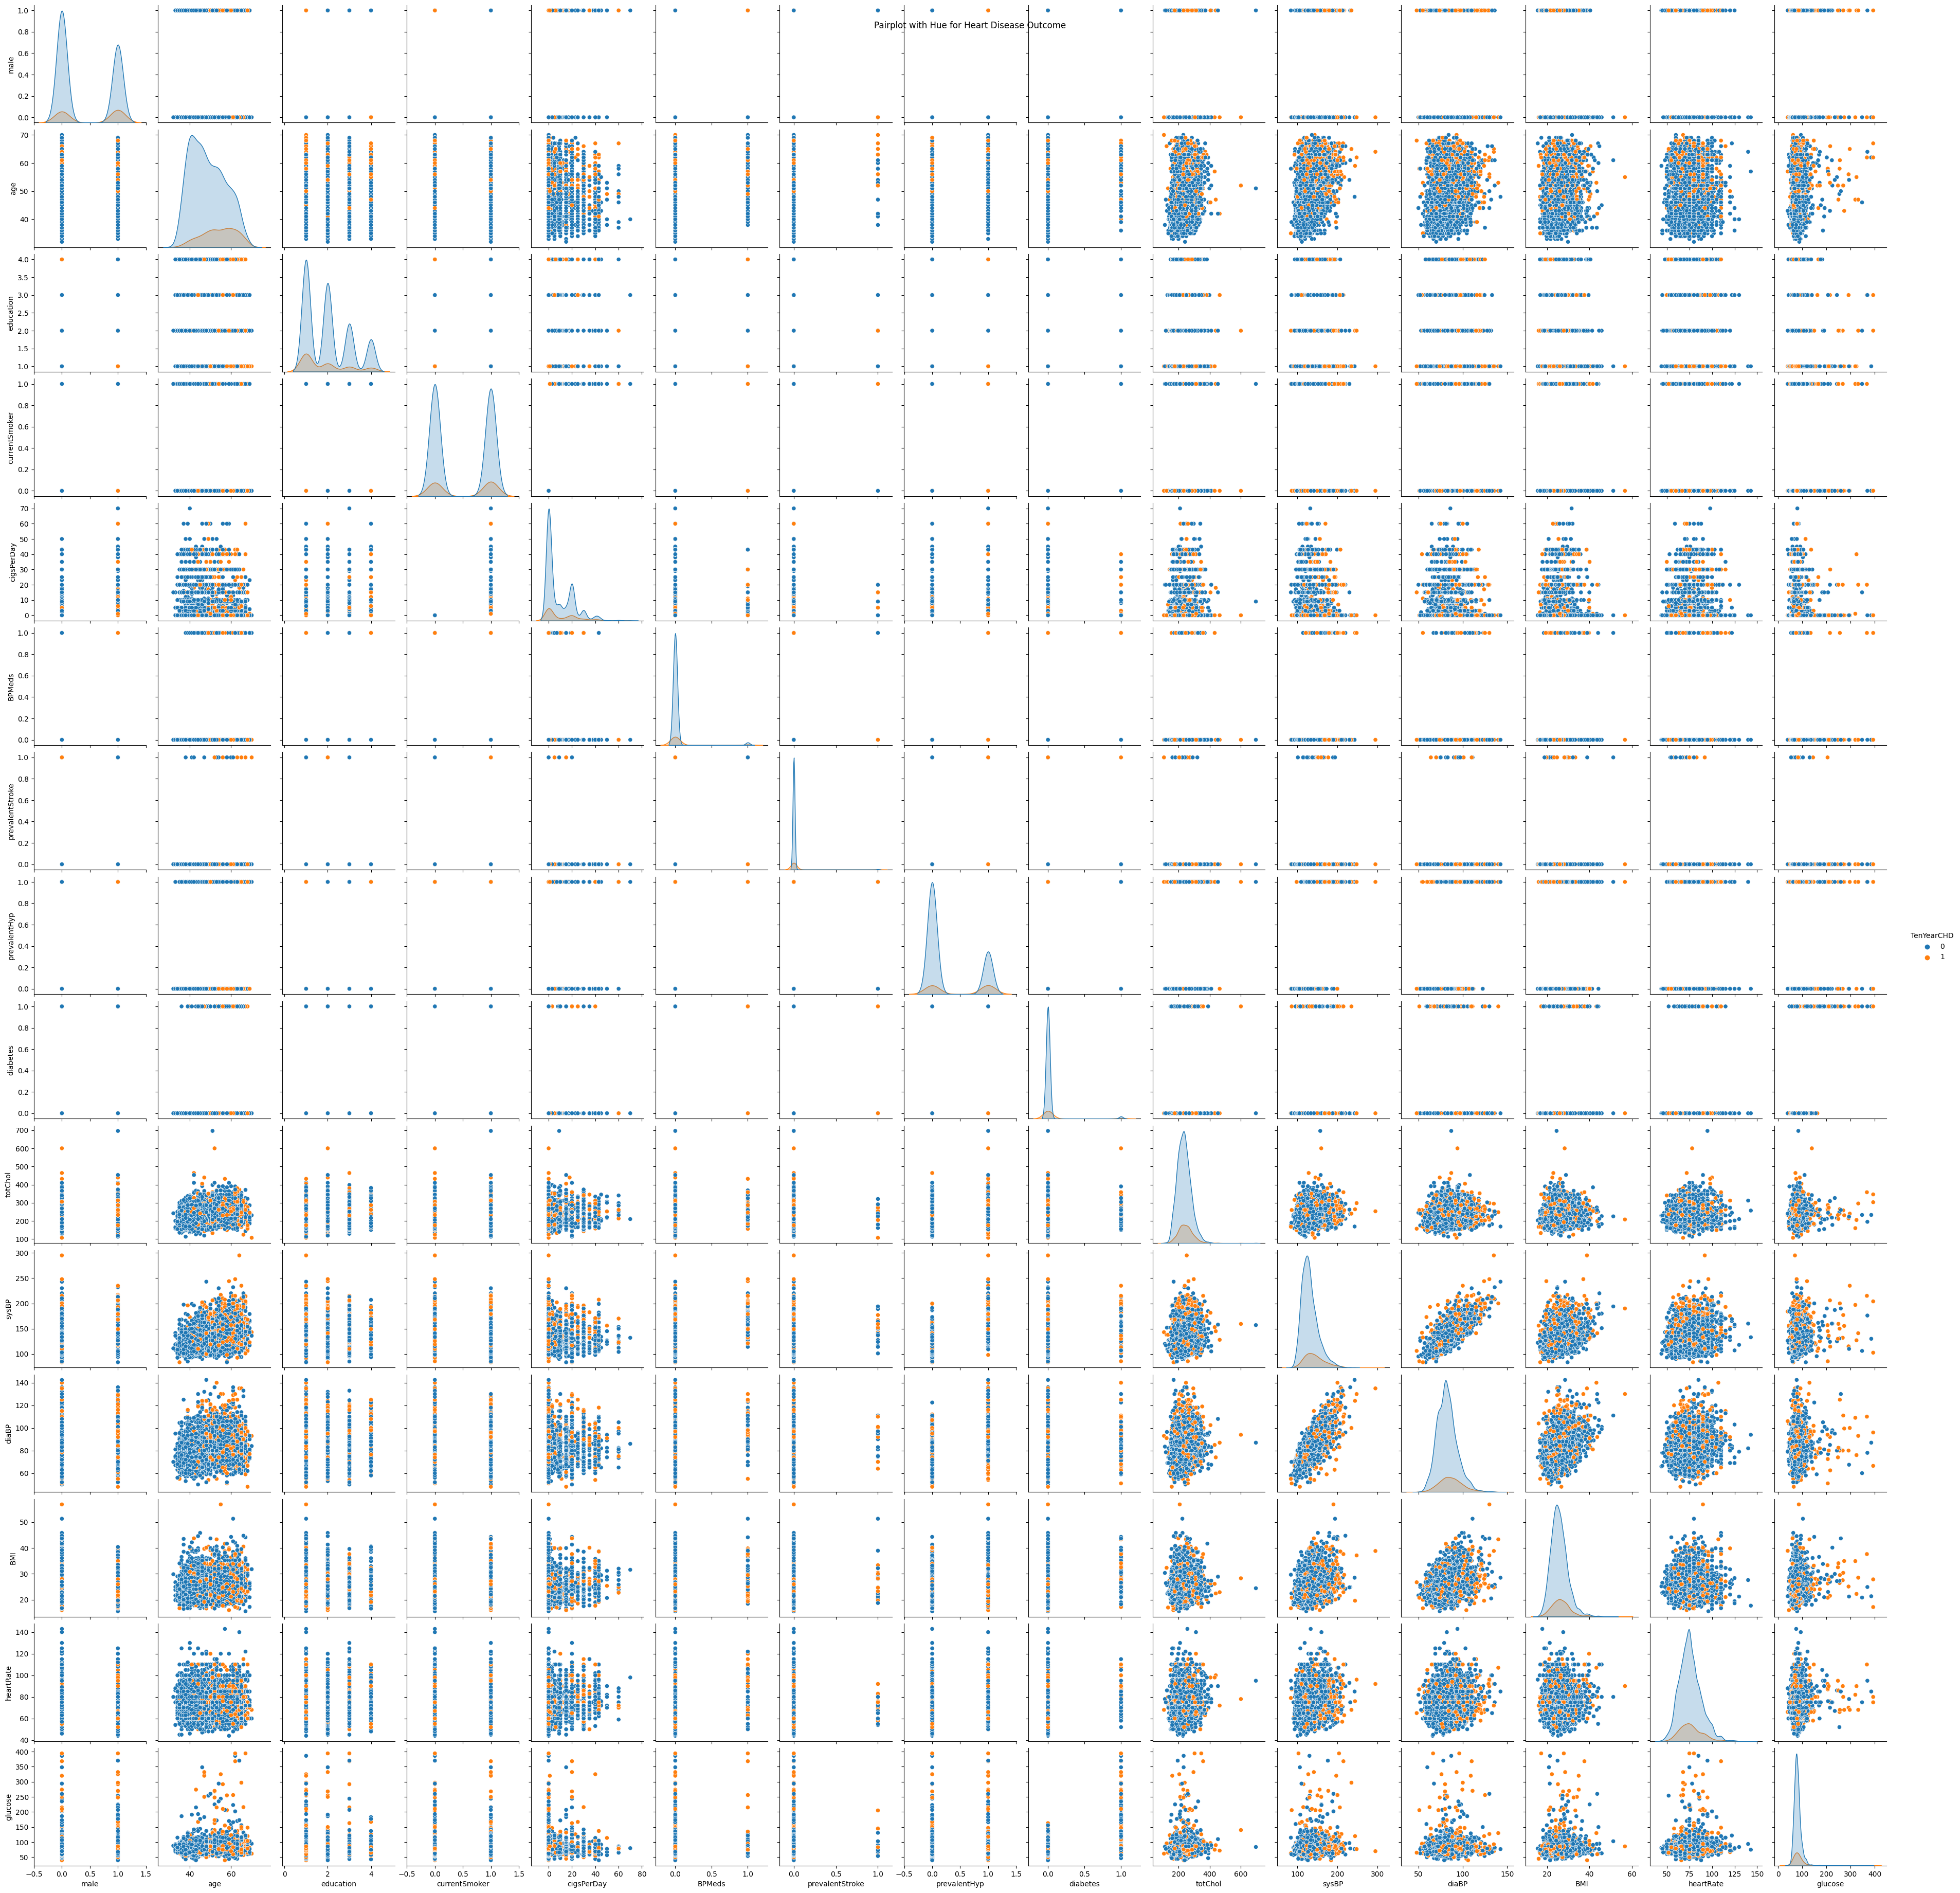

In [ ]:
sns.pairplot(df, hue='TenYearCHD')
plt.suptitle('Pairplot with Hue for Heart Disease Outcome')
plt.show()


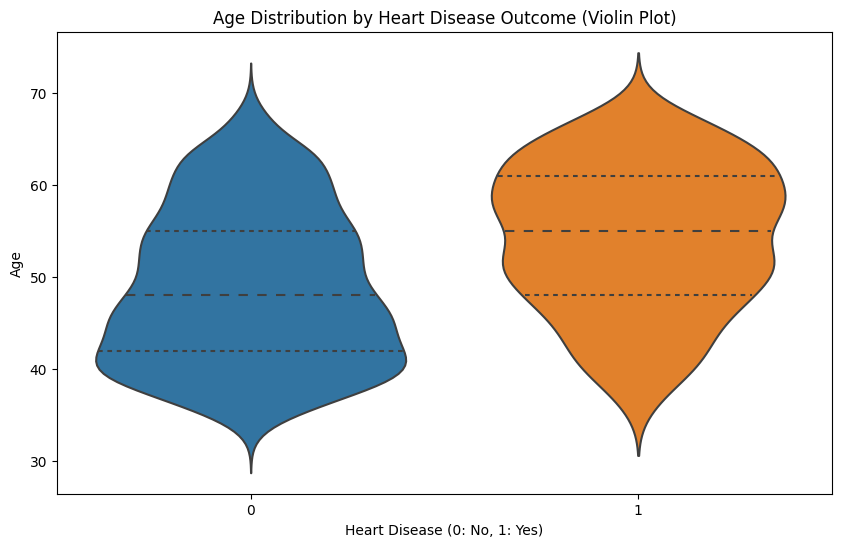

Summary Statistics of Age by Heart Disease Outcome:
             count       mean       std   min   25%   50%   75%   max
TenYearCHD                                                           
0           3594.0  48.767668  8.413457  32.0  42.0  48.0  55.0  70.0
1            644.0  54.145963  8.005663  35.0  48.0  55.0  61.0  70.0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a violin plot
sns.violinplot(data=df, x='TenYearCHD', y='age', inner='quartile')

# Set plot details
plt.title('Age Distribution by Heart Disease Outcome (Violin Plot)')
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Age')

# Display the plot
plt.show()

# Print the summary statistics
print("Summary Statistics of Age by Heart Disease Outcome:")
age_summary_by_heart_disease = df.groupby('TenYearCHD')['age'].describe()
print(age_summary_by_heart_disease)


C:\Users\shaur\AppData\Local\Temp\ipykernel_17052\3264338037.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['TenYearCHD'] == 0]['BMI'], label='No Heart Disease', shade=True)
C:\Users\shaur\AppData\Local\Temp\ipykernel_17052\3264338037.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['TenYearCHD'] == 1]['BMI'], label='Heart Disease', shade=True)


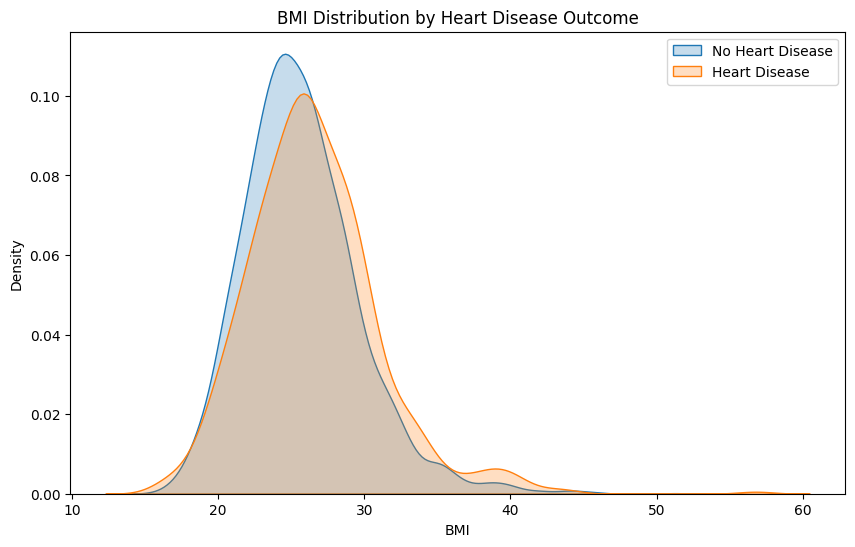

Summary Statistics of BMI by Heart Disease Outcome:
             count       mean       std    min      25%    50%      75%    max
TenYearCHD                                                                    
0           3594.0  25.673330  3.978680  15.54  23.0100  25.26  27.8700  51.28
1            644.0  26.520124  4.487743  15.96  23.6125  26.09  28.8725  56.80


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Create kernel density plots for BMI by heart disease outcome
sns.kdeplot(df[df['TenYearCHD'] == 0]['BMI'], label='No Heart Disease', shade=True)
sns.kdeplot(df[df['TenYearCHD'] == 1]['BMI'], label='Heart Disease', shade=True)

# Set plot details
plt.title('BMI Distribution by Heart Disease Outcome')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.legend()

# Display the plot
plt.show()

# Print the summary statistics
print("Summary Statistics of BMI by Heart Disease Outcome:")
bmi_summary_by_heart_disease = df.groupby('TenYearCHD')['BMI'].describe()
print(bmi_summary_by_heart_disease)


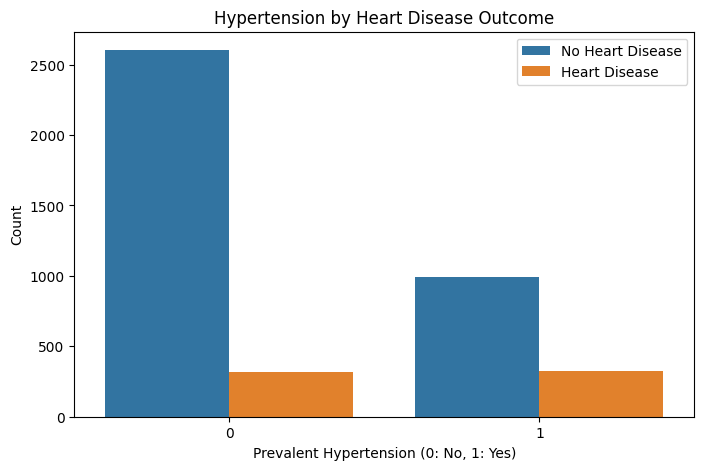

Count of Heart Disease Cases by Prevalent Hypertension:
prevalentHyp     0    1
TenYearCHD             
0             2603  991
1              319  325


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(8, 5))

# Create a count plot
sns.countplot(data=df, x='prevalentHyp', hue='TenYearCHD')

# Set plot details
plt.title('Hypertension by Heart Disease Outcome')
plt.xlabel('Prevalent Hypertension (0: No, 1: Yes)')
plt.ylabel('Count')

# Add legend
plt.legend(labels=['No Heart Disease', 'Heart Disease'])

# Display the plot
plt.show()

# Print the count of heart disease cases by prevalent hypertension
print("Count of Heart Disease Cases by Prevalent Hypertension:")
heart_disease_count_by_hypertension = df.groupby(['TenYearCHD', 'prevalentHyp']).size().unstack(fill_value=0)
print(heart_disease_count_by_hypertension)


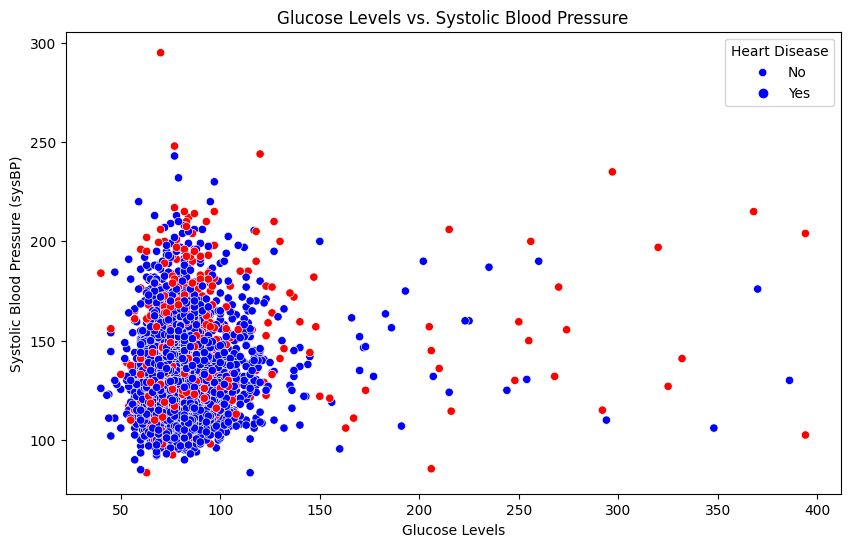

Summary Statistics of Glucose Levels and Systolic Blood Pressure by Heart Disease Outcome:
           glucose                                                       \
             count       mean        std   min   25%   50%   75%    max   
TenYearCHD                                                                
0           3594.0  80.802939  18.057869  40.0  72.0  79.0  85.0  386.0   
1            644.0  88.461704  39.553805  40.0  73.0  80.0  89.0  394.0   

             sysBP                                                           
             count        mean        std   min    25%    50%    75%    max  
TenYearCHD                                                                   
0           3594.0  130.333612  20.455232  83.5  116.0  127.0  141.0  243.0  
1            644.0  143.618789  26.690282  83.5  125.0  139.0  158.0  295.0  


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a scatter plot
sns.scatterplot(data=df, x='glucose', y='sysBP', hue='TenYearCHD', palette=['blue', 'red'])

# Set plot details
plt.title('Glucose Levels vs. Systolic Blood Pressure')
plt.xlabel('Glucose Levels')
plt.ylabel('Systolic Blood Pressure (sysBP)')

# Add legend
plt.legend(title='Heart Disease', labels=['No', 'Yes'])

# Display the plot
plt.show()

# Print the summary statistics
print("Summary Statistics of Glucose Levels and Systolic Blood Pressure by Heart Disease Outcome:")
glucose_sysBP_summary_by_heart_disease = df.groupby('TenYearCHD')[['glucose', 'sysBP']].describe()
print(glucose_sysBP_summary_by_heart_disease)


C:\Users\shaur\anaconda3\envs\yolov8\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


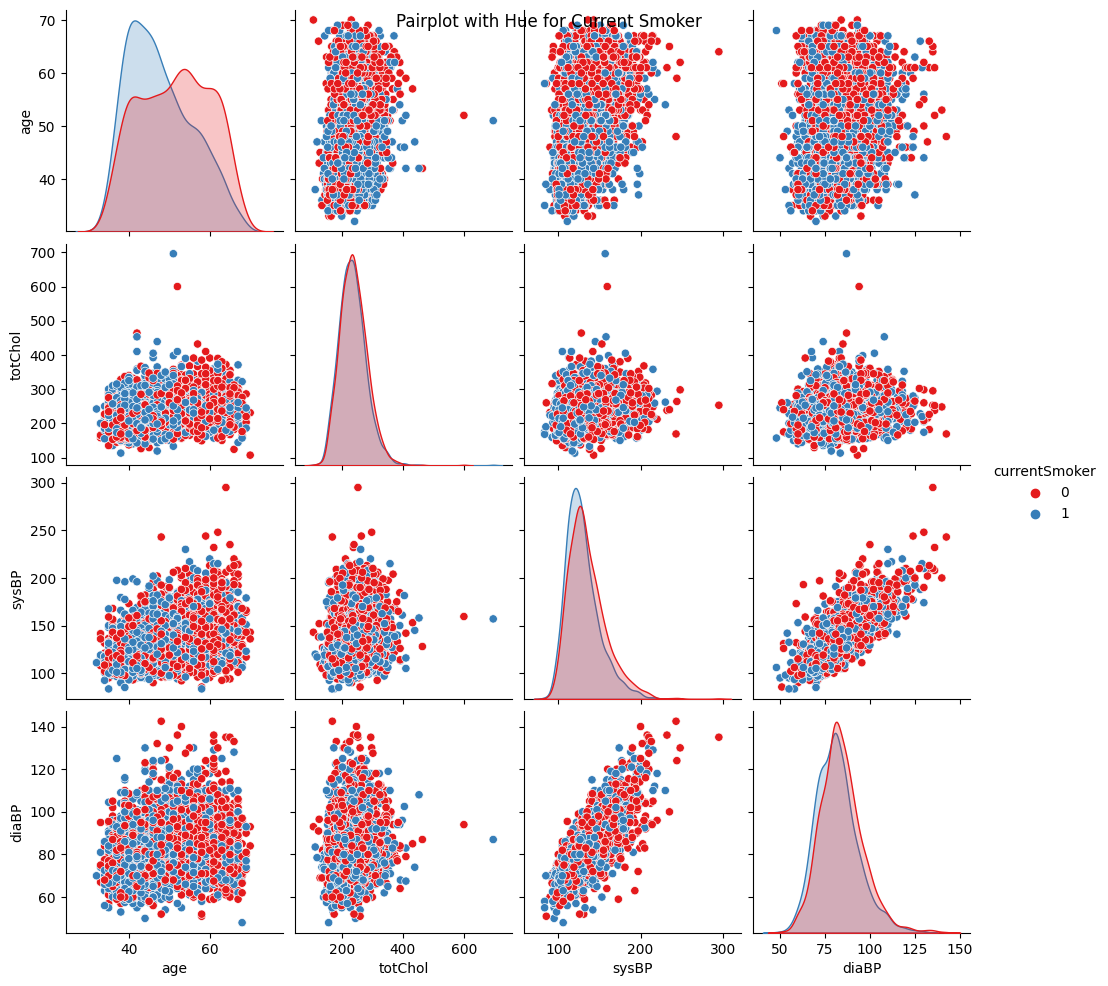

In [ ]:
sns.pairplot(df, vars=['age', 'totChol', 'sysBP', 'diaBP'], hue='currentSmoker', palette='Set1')
plt.suptitle('Pairplot with Hue for Current Smoker')
plt.show()


C:\Users\shaur\AppData\Local\Temp\ipykernel_17052\3531980404.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['TenYearCHD'] == 0]['totChol'], label='No Heart Disease', shade=True)
C:\Users\shaur\AppData\Local\Temp\ipykernel_17052\3531980404.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['TenYearCHD'] == 1]['totChol'], label='Heart Disease', shade=True)


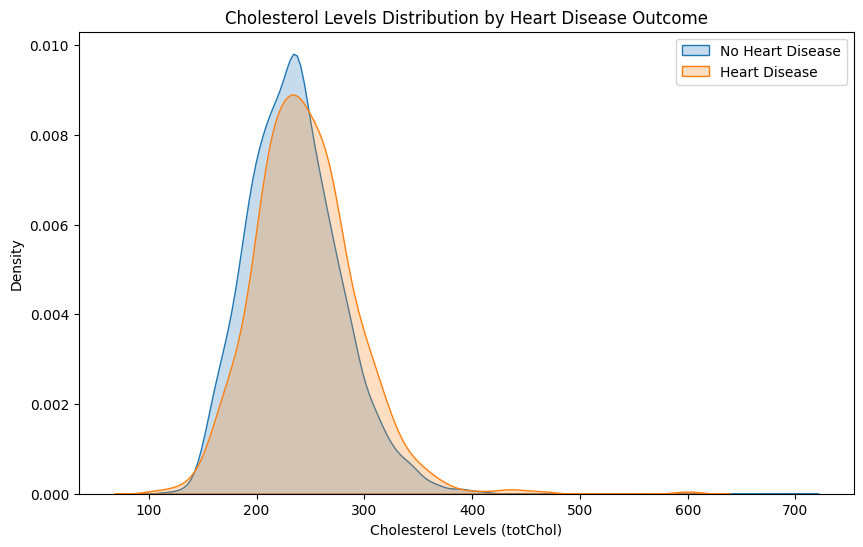

Summary Statistics of Cholesterol Levels by Heart Disease Outcome:
             count        mean        std    min    25%    50%    75%    max
TenYearCHD                                                                  
0           3594.0  235.190202  43.514938  113.0  205.0  233.0  261.0  696.0
1            644.0  245.267848  47.748915  107.0  214.0  240.5  271.0  600.0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Create kernel density plots for cholesterol levels by heart disease outcome
sns.kdeplot(df[df['TenYearCHD'] == 0]['totChol'], label='No Heart Disease', shade=True)
sns.kdeplot(df[df['TenYearCHD'] == 1]['totChol'], label='Heart Disease', shade=True)

# Set plot details
plt.title('Cholesterol Levels Distribution by Heart Disease Outcome')
plt.xlabel('Cholesterol Levels (totChol)')
plt.ylabel('Density')
plt.legend()

# Display the plot
plt.show()

# Print the summary statistics
print("Summary Statistics of Cholesterol Levels by Heart Disease Outcome:")
cholesterol_summary_by_heart_disease = df.groupby('TenYearCHD')['totChol'].describe()
print(cholesterol_summary_by_heart_disease)


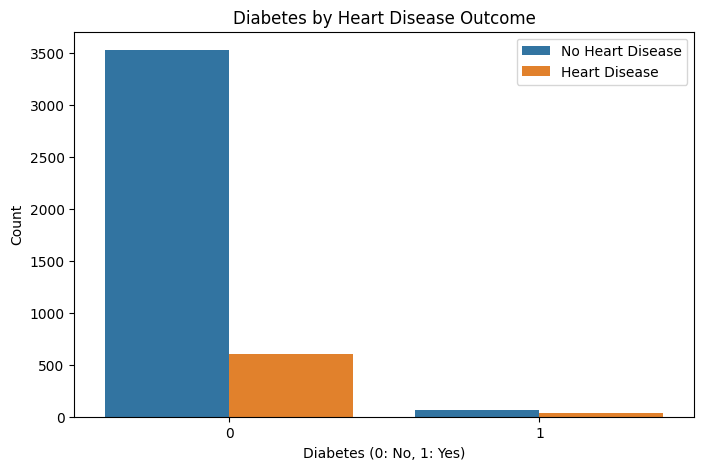

Count of Heart Disease Cases by Diabetes Status:
diabetes       0   1
TenYearCHD          
0           3525  69
1            604  40


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(8, 5))

# Create a count plot
sns.countplot(data=df, x='diabetes', hue='TenYearCHD')

# Set plot details
plt.title('Diabetes by Heart Disease Outcome')
plt.xlabel('Diabetes (0: No, 1: Yes)')
plt.ylabel('Count')

# Add legend
plt.legend(labels=['No Heart Disease', 'Heart Disease'])

# Display the plot
plt.show()

# Print the count of heart disease cases by diabetes status
print("Count of Heart Disease Cases by Diabetes Status:")
heart_disease_count_by_diabetes = df.groupby(['TenYearCHD', 'diabetes']).size().unstack(fill_value=0)
print(heart_disease_count_by_diabetes)


C:\Users\shaur\anaconda3\envs\yolov8\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


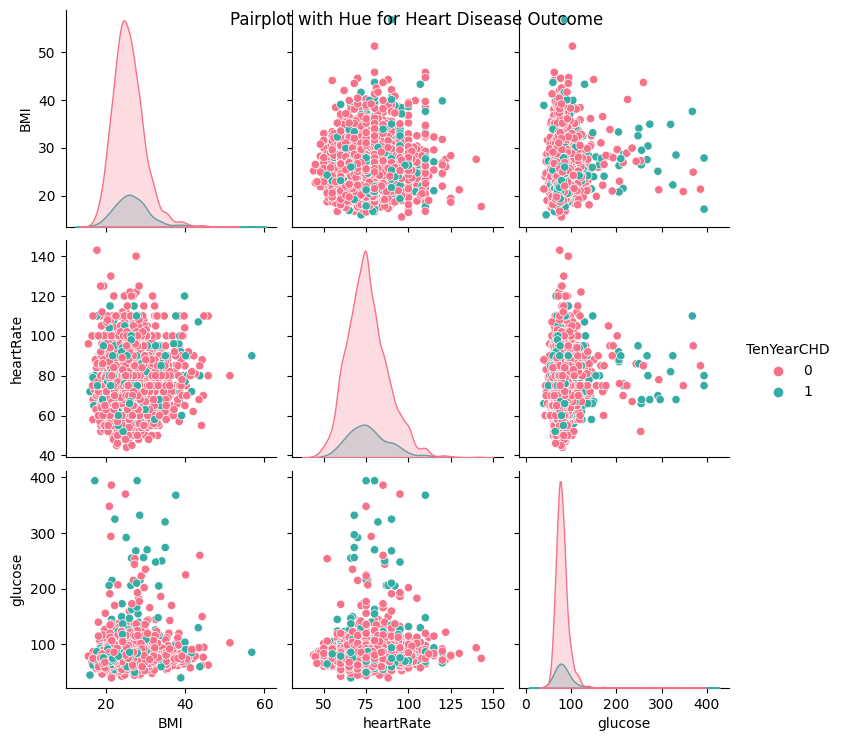

In [ ]:
sns.pairplot(df, vars=['BMI', 'heartRate', 'glucose'], hue='TenYearCHD', palette='husl')
plt.suptitle('Pairplot with Hue for Heart Disease Outcome')
plt.show()


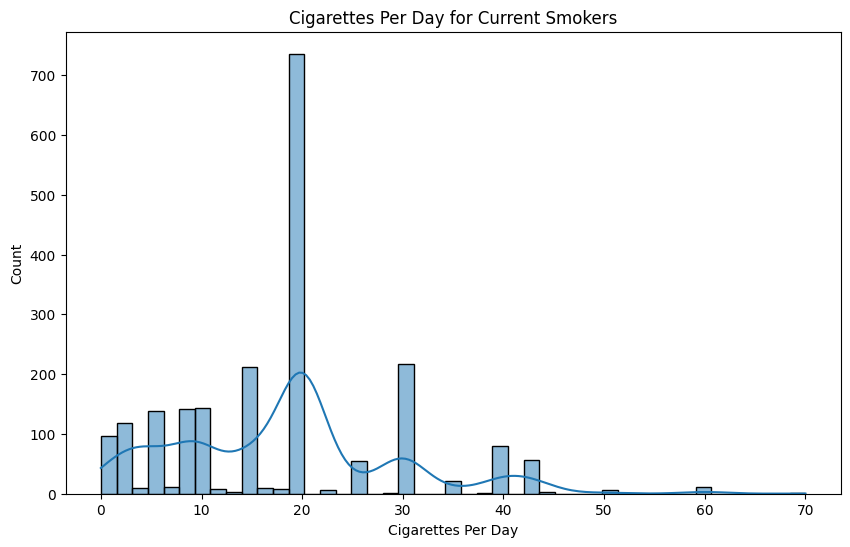

Summary Statistics of Cigarettes Per Day for Current Smokers:
count    2094.000000
mean       18.096466
std        11.001553
min         0.000000
25%        10.000000
50%        20.000000
75%        20.000000
max        70.000000
Name: cigsPerDay, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a histogram for cigarettes per day among current smokers
sns.histplot(df[df['currentSmoker'] == 1]['cigsPerDay'], kde=True)

# Set plot details
plt.title('Cigarettes Per Day for Current Smokers')
plt.xlabel('Cigarettes Per Day')
plt.ylabel('Count')

# Display the plot
plt.show()

# Print the summary statistics
print("Summary Statistics of Cigarettes Per Day for Current Smokers:")
cigs_per_day_summary = df[df['currentSmoker'] == 1]['cigsPerDay'].describe()
print(cigs_per_day_summary)


# Taking care of the missing value

# Education

In [ ]:
mode_education = df['education'].mode()[0]
df['education'].fillna(mode_education, inplace=True)


# Cigerates per day

In [ ]:
df['cigsPerDay'].fillna(0, inplace=True)


# BP MED

In [ ]:
df['BPMeds'].fillna(0, inplace=True)


# Tot Chol

In [ ]:
mean_totChol = df['totChol'].mean()
df['totChol'].fillna(mean_totChol, inplace=True)


# BMI

In [ ]:
mean_BMI = df['BMI'].mean()
df['BMI'].fillna(mean_BMI, inplace=True)


# Heart Rate

In [ ]:
mean_heartRate = df['heartRate'].mean()
df['heartRate'].fillna(mean_heartRate, inplace=True)


# Glucose

In [ ]:
mean_glucose = df['glucose'].mean()
df['glucose'].fillna(mean_glucose, inplace=True)


In [ ]:
missing_values_after = df.isnull().sum()
print("Missing Values After Handling:\n", missing_values_after)


Missing Values After Handling:
 male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


# Modelling

# Split the Dataset

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train the Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)


C:\Users\shaur\anaconda3\envs\yolov8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Make Predictions

In [ ]:
y_pred = logistic_model.predict(X_test)


# Evaluate the Model

Confusion Matrix:
 [[717   7]
 [120   4]]


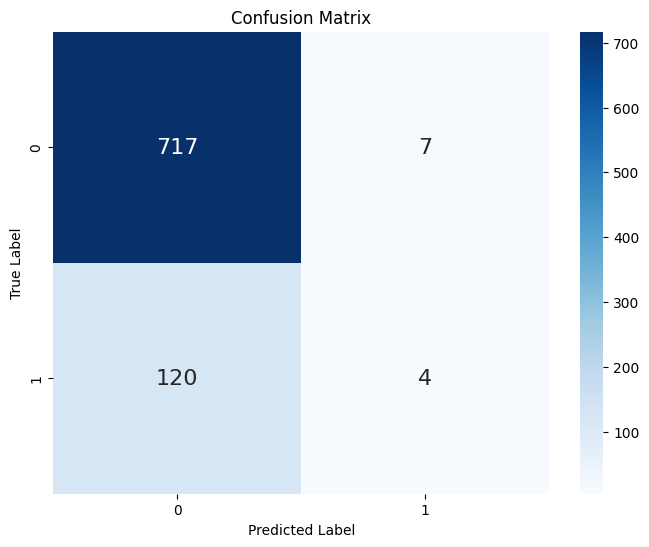

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



# Classification Report

In [ ]:
from sklearn.metrics import classification_report

print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.50      0.04      0.07       124

    accuracy                           0.85       848
   macro avg       0.68      0.52      0.50       848
weighted avg       0.81      0.85      0.80       848



# Accuracy Score

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8537735849056604


# Roc Curve

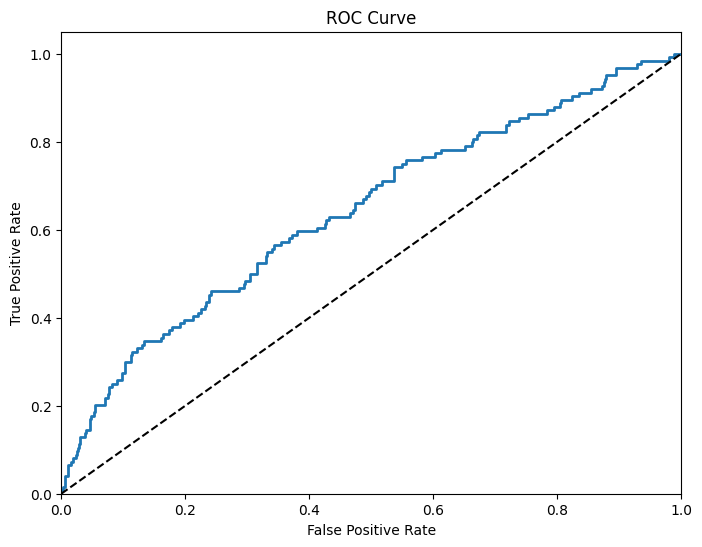

AUC: 0.6422317768668686


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for the positive class
y_probs = logistic_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate the AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_probs)
print("AUC:", auc)


# Precision Recall Curve

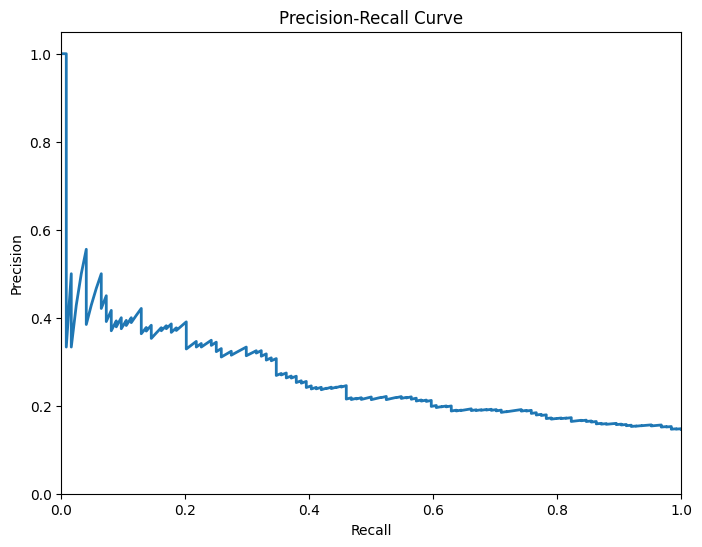

Average Precision: 0.2657020691340324


In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calculate the precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Calculate the average precision
avg_precision = average_precision_score(y_test, y_probs)
print("Average Precision:", avg_precision)


Confusion Matrix:
 [[719   5]
 [115   9]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.64      0.07      0.13       124

    accuracy                           0.86       848
   macro avg       0.75      0.53      0.53       848
weighted avg       0.83      0.86      0.81       848

Accuracy: 0.8584905660377359


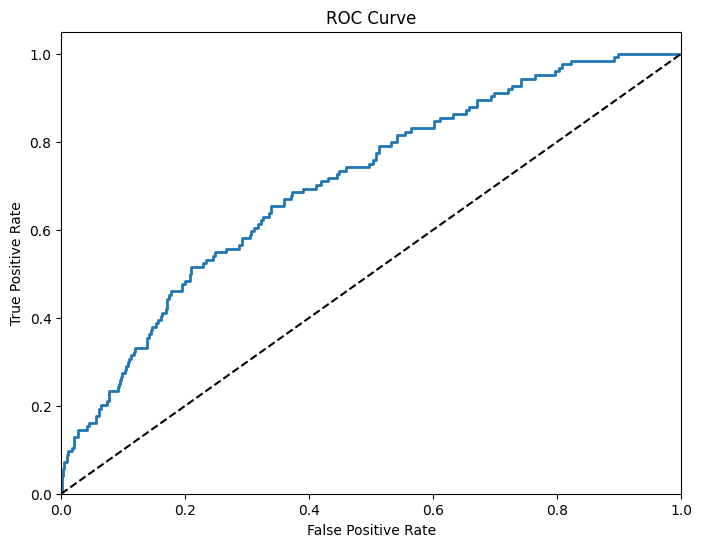

AUC: 0.7059236321511316


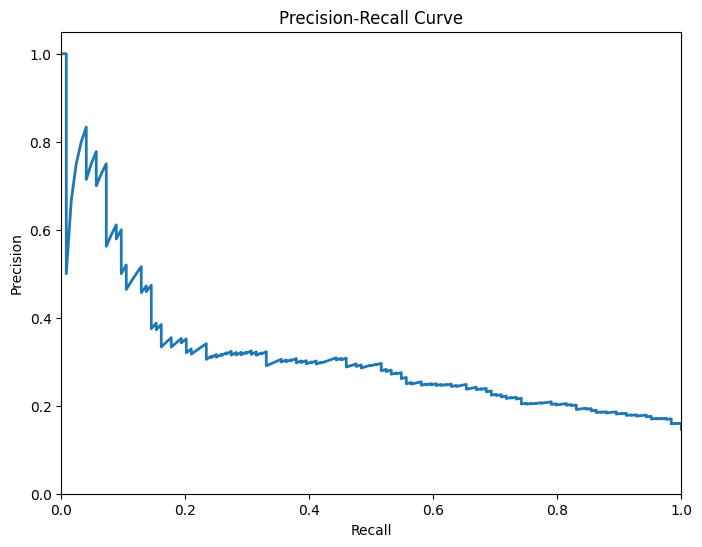

Average Precision: 0.31726697080106686


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

# Handle missing values
# ... (Code for handling missing values as discussed earlier)

# Split the data
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameters for tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
}

# Perform hyperparameter tuning with cross-validation
grid_search = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_logistic_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_logistic_model.predict(X_test)
y_probs = best_logistic_model.predict_proba(X_test)[:, 1]

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

print("Classification Report:\n", classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

auc = roc_auc_score(y_test, y_probs)
print("AUC:", auc)

# Precision-Recall Curve and Average Precision
precision, recall, _ = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

avg_precision = average_precision_score(y_test, y_probs)
print("Average Precision:", avg_precision)


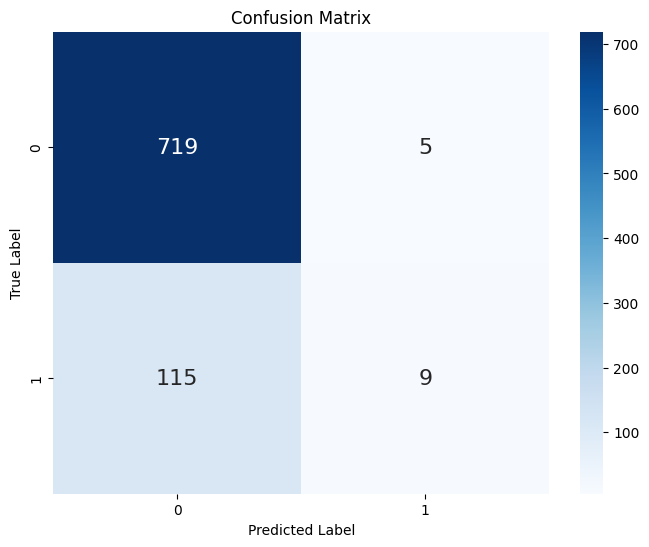

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Given confusion matrix
cm = [[719, 5],
      [115, 9]]

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# Gradient Booster

Confusion Matrix:
 [[705  19]
 [112  12]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91       724
           1       0.39      0.10      0.15       124

    accuracy                           0.85       848
   macro avg       0.63      0.54      0.53       848
weighted avg       0.79      0.85      0.80       848

Accuracy: 0.8455188679245284


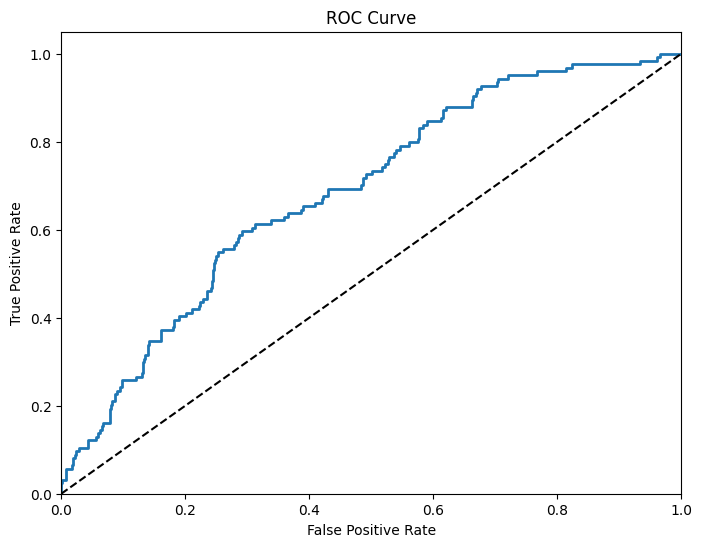

AUC: 0.6865420602388166


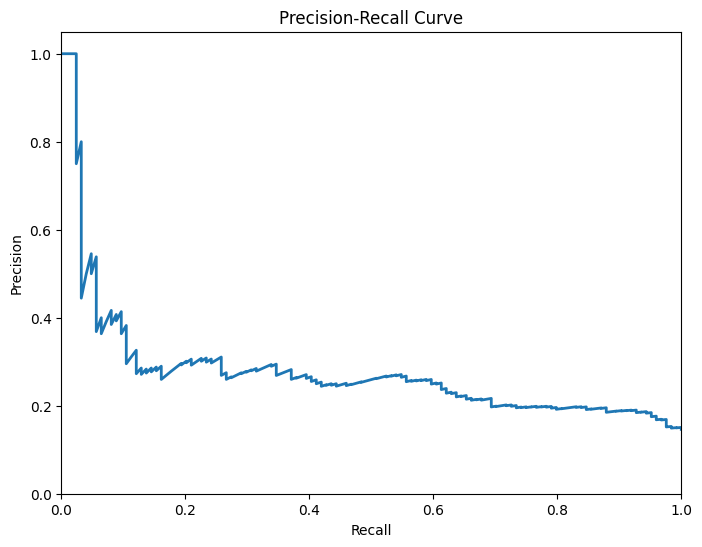

Average Precision: 0.27860542758480455


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score


# Split the data into training and testing sets
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Gradient Boosting model
gbt_model = GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=42)
gbt_model.fit(X_train, y_train)

# Make predictions with the GBT model
y_pred = gbt_model.predict(X_test)

# Evaluate the GBT model
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

print("Classification Report:\n", classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# ROC Curve and AUC
y_probs = gbt_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

auc = roc_auc_score(y_test, y_probs)
print("AUC:", auc)

# Precision-Recall Curve and Average Precision
precision, recall, _ = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

avg_precision = average_precision_score(y_test, y_probs)
print("Average Precision:", avg_precision)


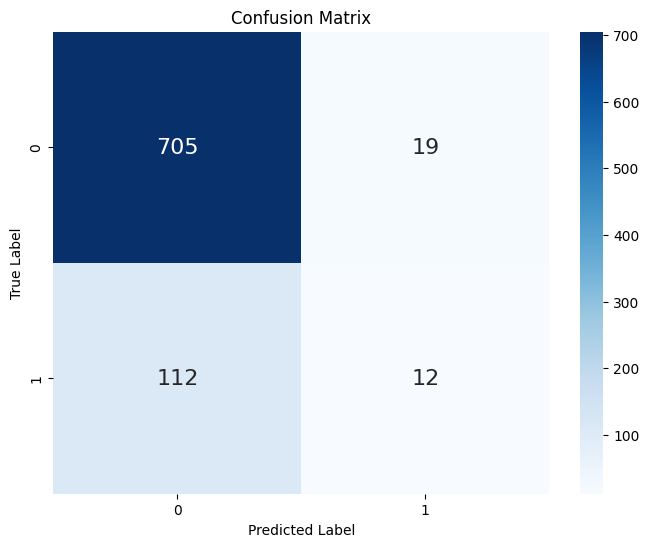

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Given confusion matrix
cm = [[705, 19],
      [112, 12]]

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Confusion Matrix:
 [[717   7]
 [120   4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.36      0.03      0.06       124

    accuracy                           0.85       848
   macro avg       0.61      0.51      0.49       848
weighted avg       0.78      0.85      0.79       848

Accuracy: 0.8502358490566038


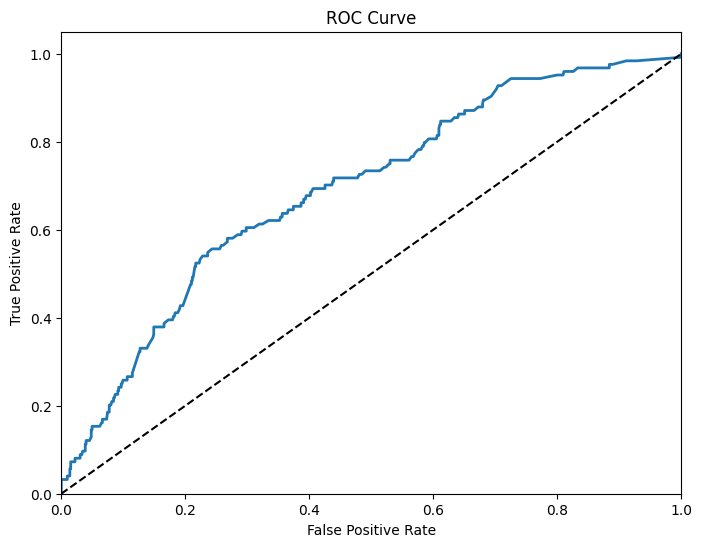

AUC: 0.6903515416146855


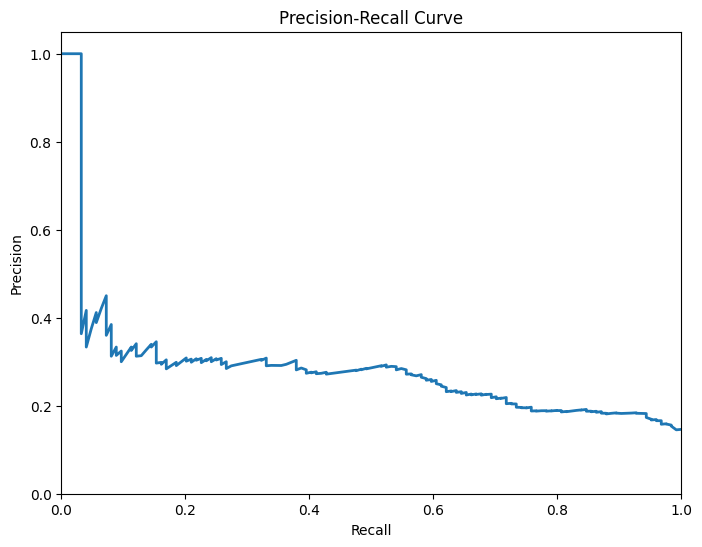

Average Precision: 0.28497739241579845


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

# Split the data into training and testing sets
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameters and their potential values for tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.05, 0.1, 0.2],
}

# Perform hyperparameter tuning with cross-validation
grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_gbt_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_gbt_model.predict(X_test)

# Evaluate the optimized model
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

print("Classification Report:\n", classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# ROC Curve and AUC
y_probs = best_gbt_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

auc = roc_auc_score(y_test, y_probs)
print("AUC:", auc)

# Precision-Recall Curve and Average Precision
precision, recall, _ = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

avg_precision = average_precision_score(y_test, y_probs)
print("Average Precision:", avg_precision)


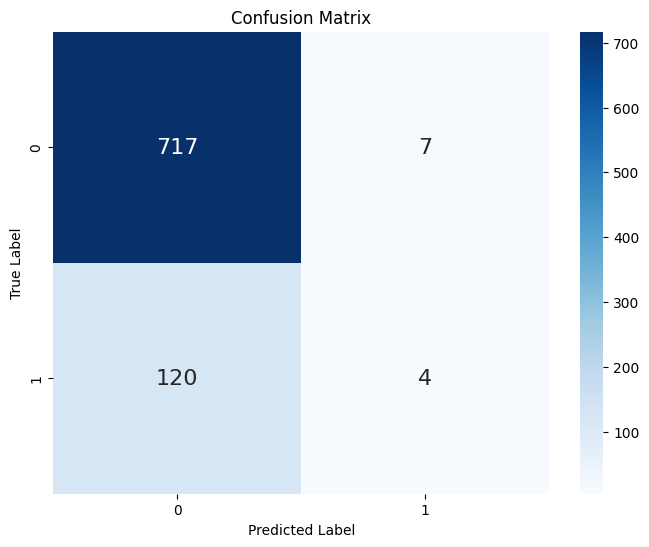

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Given confusion matrix
cm = [[717, 7],
      [120, 4]]

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


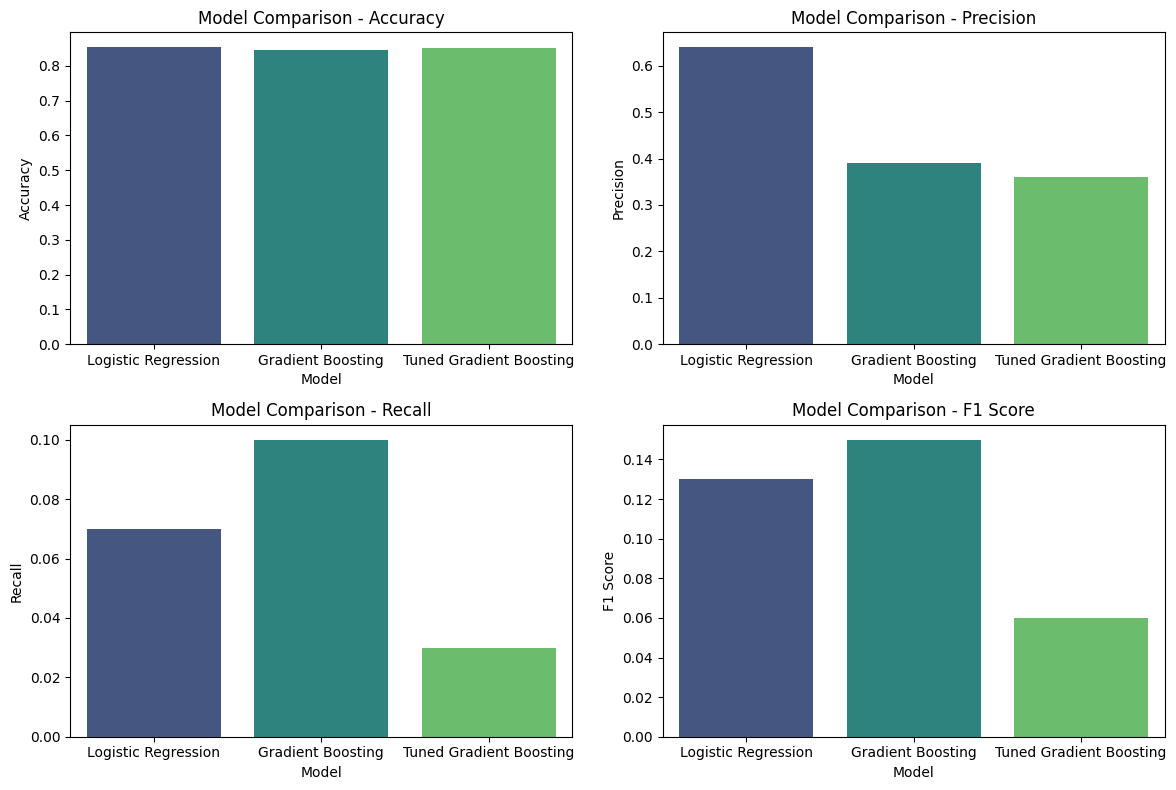

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Results from different models
model_names = ['Logistic Regression', 'Gradient Boosting', 'Tuned Gradient Boosting']
accuracy_scores = [0.8538, 0.8455, 0.8502]
precision_scores = [0.64, 0.39, 0.36]
recall_scores = [0.07, 0.10, 0.03]
f1_scores = [0.13, 0.15, 0.06]

# Create a DataFrame for easy plotting
results_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
})

# Set the figure size
plt.figure(figsize=(12, 8))

# Plotting accuracy
plt.subplot(2, 2, 1)
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')
plt.title('Model Comparison - Accuracy')
plt.ylabel('Accuracy')

# Plotting precision
plt.subplot(2, 2, 2)
sns.barplot(x='Model', y='Precision', data=results_df, palette='viridis')
plt.title('Model Comparison - Precision')
plt.ylabel('Precision')

# Plotting recall
plt.subplot(2, 2, 3)
sns.barplot(x='Model', y='Recall', data=results_df, palette='viridis')
plt.title('Model Comparison - Recall')
plt.ylabel('Recall')

# Plotting F1 Score
plt.subplot(2, 2, 4)
sns.barplot(x='Model', y='F1 Score', data=results_df, palette='viridis')
plt.title('Model Comparison - F1 Score')
plt.ylabel('F1 Score')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()
